# Data Setup
Reads the time intervals from csv file and uses pySpedas to get the parallel electric field signals.
All data is saved in a pandas dataframe including the signal_id, dimension and signal data.

In [39]:
filename = "./Tevents.csv"  # Change the path to file in your computer
rows = []
with open(filename, "r") as f:
    for line in f:
        rows.append(line.split(","))


In [40]:
import os
# path for loading data 
os.environ["SPEDAS_DATA_DIR"] = "/Volumes/datadir/mmsdata" # "/Users/naah5403/data" 

In [41]:
# checking the time format
print(rows[0][0],rows[1][0])

2017-05-28/03:55:25.065 2017-05-28/03:55:25.612


In [42]:
# converting the time interval to trange to pass to pySpedas
import numpy as np
trange = np.empty(len(rows[0]), dtype=object)
for i in range(0,len(rows[0])):
    trange[i] = [rows[0][i],rows[1][i]]

In [50]:
# number of signals
print("Number of signals: ", len(rows[0]))

Number of signals:  1422


In [44]:
# importing the pySpedas and pytplot for MMS data manipulation
import pyspedas
from pytplot import tplot, del_data, options, get_data, store_data, ylim, tplot_options, tlimit, tplot_names
from pytplot.tplot_math import tdotp, tcrossp
import matplotlib.pyplot as plt

18-Nov-25 11:42:04: Downloading mms1_edp_brst_l2_dce_20170528035333_v3.0.0.cdf to /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28
18-Nov-25 11:42:19: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/fast/l2/dce/2017/05/mms1_edp_fast_l2_dce_20170528_v3.0.1.cdf


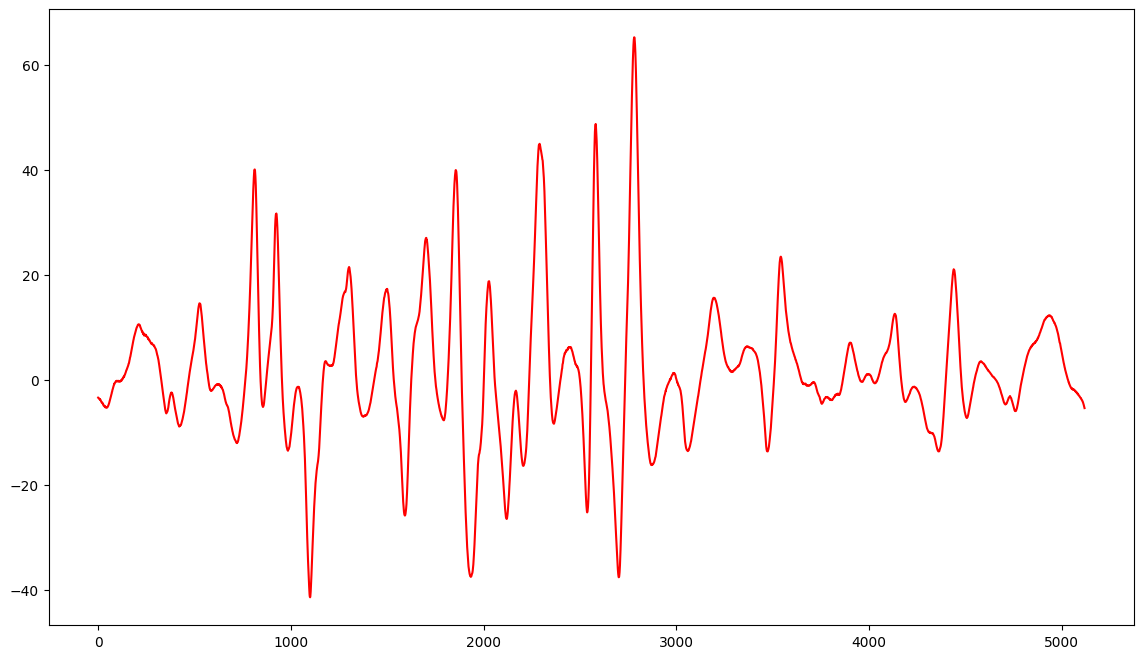

In [45]:
# checking the data for one timerange
k=1
probe='1'
pyspedas.mms.edp(trange=trange[k], data_rate='brst', probe=probe, datatype=['dce'], time_clip=True)
pyspedas.mms.edp(trange=trange[k], data_rate='fast', probe=probe, datatype=['dce'], time_clip=True)

Eparb = get_data('mms1_edp_dce_par_epar_brst_l2')
Eparf = get_data('mms1_edp_dce_par_epar_fast_l2')
plt.figure(figsize=(14, 8))
plt.tight_layout()
plt.plot(Eparb.y[:,1], 'r')


In [46]:
import numpy as np
import pandas as pd
from scipy.signal import resample, resample_poly

# --- Configuration ---
NUM_SIGNALS = 1422
TARGET_LEN = 1000 # if needs to interplate  to a fixed length

signals_data = []
probe='1'
# load the signals and save in a panadas dataframe
for i in range(NUM_SIGNALS):
    pyspedas.mms.edp(trange=trange[i], data_rate='brst', probe=probe, datatype=['dce'], time_clip=True)

    Eparb = get_data('mms1_edp_dce_par_epar_brst_l2')

    # get the signal
    dimension = Eparb.y[:,1].shape[0]
    signal = Eparb.y[:,1]
    signal_downsample = 

    # Resample to 1/8
    signal_resampled = resample(signal, len(signal)/8)


    # Store the signal and its metadata
    signals_data.append({
        #'dimension': dimension,
        'time_series': signal_resampled # The actual NumPy array of the signal downsampled
    })

# --- Structure the Dataset ---
# For a dataset where signals have different dimensions, a common structure
# is a list of dictionaries or a Pandas DataFrame where the signal itself is
# stored as a NumPy array or list inside a column.

# Convert the list of dictionaries to a Pandas DataFrame
df_signals = pd.DataFrame(signals_data)

# --- Display Example Signals and Summary ---
print("--- Dataset Summary ---")
print(f"Total signals generated: {NUM_SIGNALS}")


18-Nov-25 11:42:40: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035333_v3.0.0.cdf
18-Nov-25 11:42:44: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035333_v3.0.0.cdf
18-Nov-25 11:42:46: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
18-Nov-25 11:42:51: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
18-Nov-25 11:42:53: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
18-Nov-25 11:42:57: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
18-Nov-25 11:43:00: Loading /Volumes/datadir/mmsdata/mms/mms1/edp/brst/l2/dce/2017/05/28/mms1_edp_brst_l2_dce_20170528035543_v3.0.0.cdf
18-Nov-25 11:43:03: Loading /Volumes/datadir/mms

--- Dataset Summary ---
Total signals generated: 1422


In [47]:
print("\n--- Example Signals and Metadata ---")
print(df_signals[['signal_id', 'dimension']].head())
example_signal = df_signals.loc[0, 'time_series']
print(f"Signal 0 (Dimension: {df_signals.loc[0, 'dimension']}):")
print(example_signal[:5])
print("...")


--- Example Signals and Metadata ---
   signal_id  dimension
0          0       4481
1          1       5120
2          2       6013
3          3       6275
4          4       5628
Signal 0 (Dimension: 4481):
[4.218142  4.187014  4.2369833 4.2725954 4.2770786]
...


In [48]:
df_signals.loc[1, 'time_series'].shape

(5120,)

In [53]:
# Prevent NumPy from truncating array representations when converted to string
np.set_printoptions(threshold=np.inf) 
# saving the data in a csv file
df_signals.to_csv('signal_dataframe.csv', index=False)

In [55]:
# saving the data in a pkl file
df_signals.to_pickle("./mms_signals.pkl")  

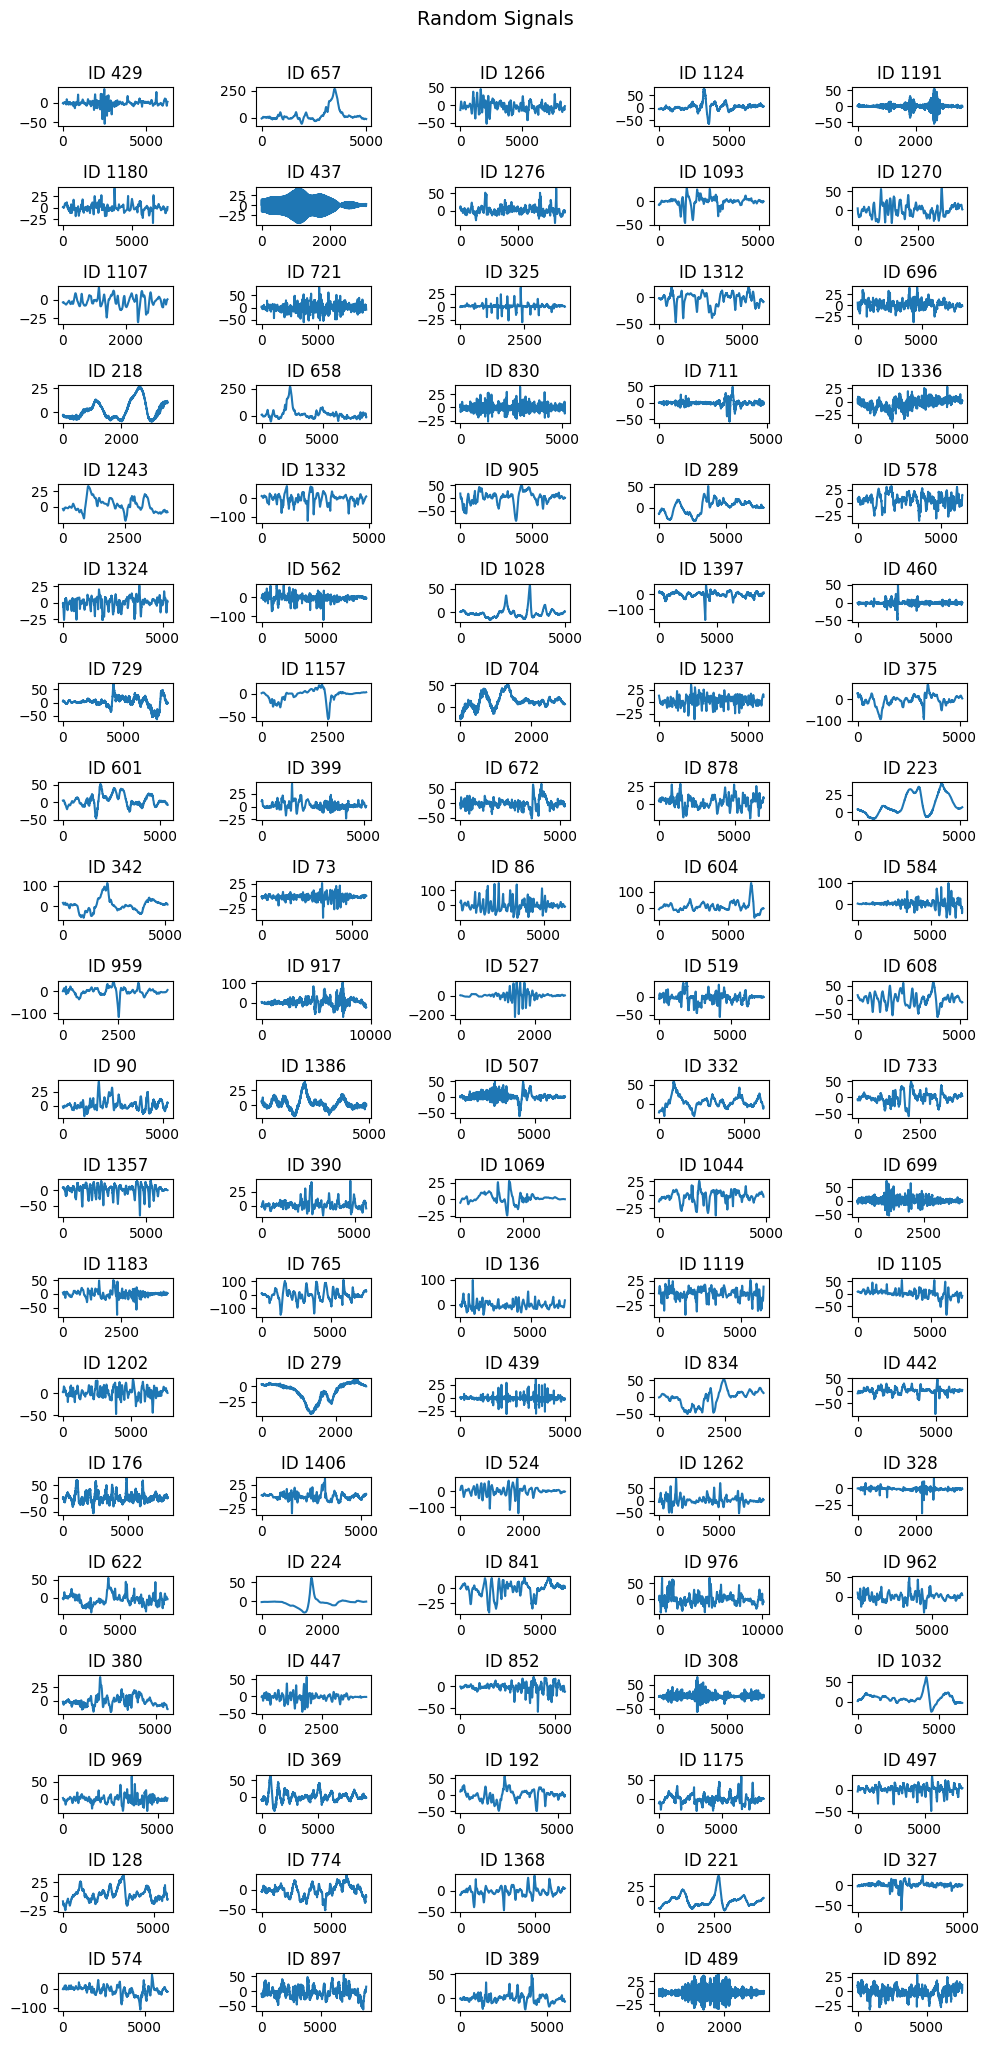

Displayed sample signals.


In [54]:
import random
# --------------------------------
#  Plot Random Signals
# --------------------------------
sample_indices = random.sample(range(len(df_signals)), 100)

plt.figure(figsize=(10, 20))
for i, idx in enumerate(sample_indices):
    plt.subplot(20, 5, i + 1)
    plt.plot(df_signals.loc[idx, "time_series"])
    plt.title(f"ID {idx}")
    plt.tight_layout()
plt.suptitle("Random Signals", fontsize=14, y=1.02)
plt.show()
print("Displayed sample signals.")
